In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importing the dataset and assigning it to a variable
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fraud_detection_dataset.csv")

In [4]:
temp= df #keeping all the variable in a temporary dataframe
temp.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#**Data Preprocessing and Cleaning**

In [ ]:
rows, cols = df.shape
print(f' There are {rows} rows and {cols} columns in the dataset.')

 There are 6362620 rows and 11 columns in the dataset.


In [ ]:
df.head()#Printing the first 5 rows in the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info() #information relating to the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#**NOTE: There are no null values in the dataset. Cleaning isn't necessary.**

In [ ]:
print(f'There are {df.duplicated().sum()} No. of duplicates in the dataset.')

There are 0 No. of duplicates in the dataset.


# **Note: It appears there are no duplicates in the dataset. Dropping isnt necessary**

In [ ]:
#Checking whether the class (Dependent feature = "isFraud") is imbalanced or not
df['isFraud'].value_counts(normalize = True) * 100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

# **Note: It appears that the dataset is imbalanced as the feature contains 99.8% of fields including value '1' and 0.12% including '0'. To resolve this problem so as to equally partition the train and test, we will split this data using the stratified sampling method in train_test_split phase**

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
df.describe() #Summary of the data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


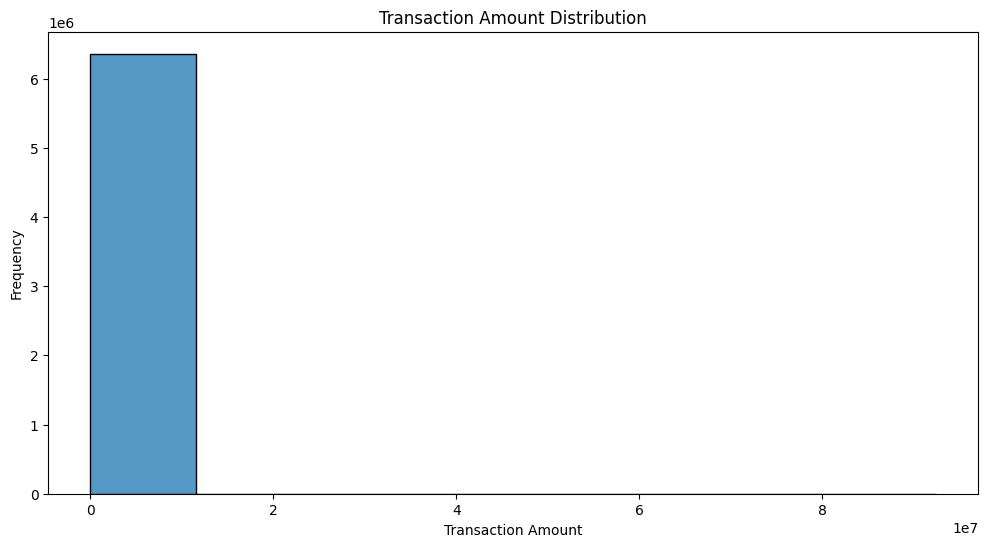

In [ ]:
# Data Distribution Visualization for txn amt
plt.figure(figsize=(12, 6))
sns.histplot(df['amount'], bins=8)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

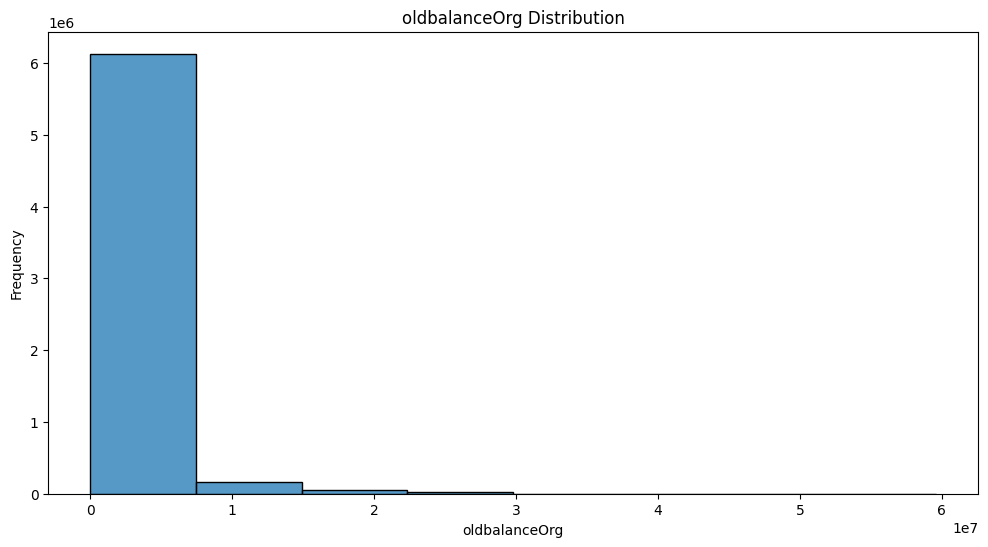

In [ ]:
# Data Distribution Visualization for old balance orig
plt.figure(figsize=(12, 6))
sns.histplot(df['oldbalanceOrg'], bins=8)
plt.title('oldbalanceOrg Distribution')
plt.xlabel('oldbalanceOrg')
plt.ylabel('Frequency')
plt.show()

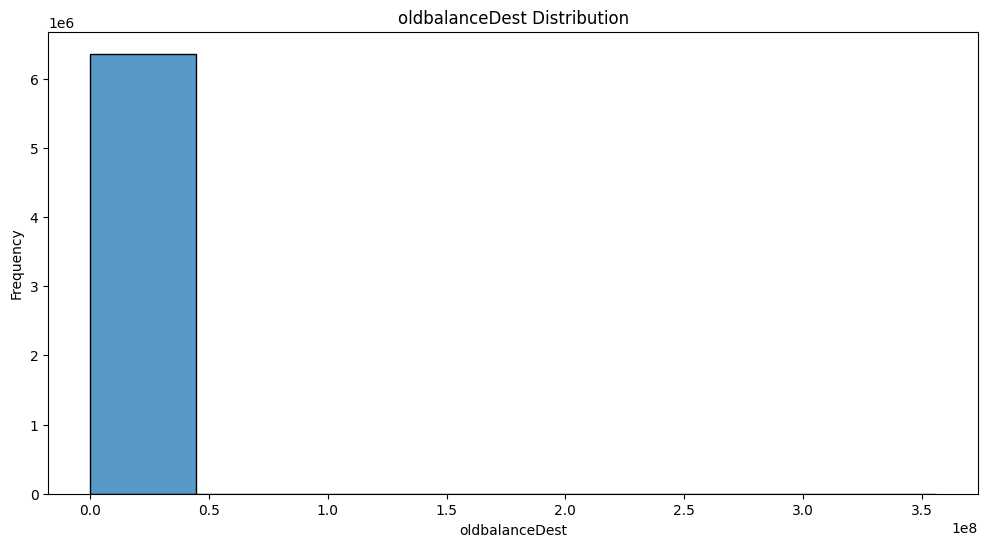

In [ ]:
# Data Distribution Visualization for old balance Dest
plt.figure(figsize=(12, 6))
sns.histplot(df['oldbalanceDest'], bins=8)
plt.title('oldbalanceDest Distribution')
plt.xlabel('oldbalanceDest')
plt.ylabel('Frequency')
plt.show()

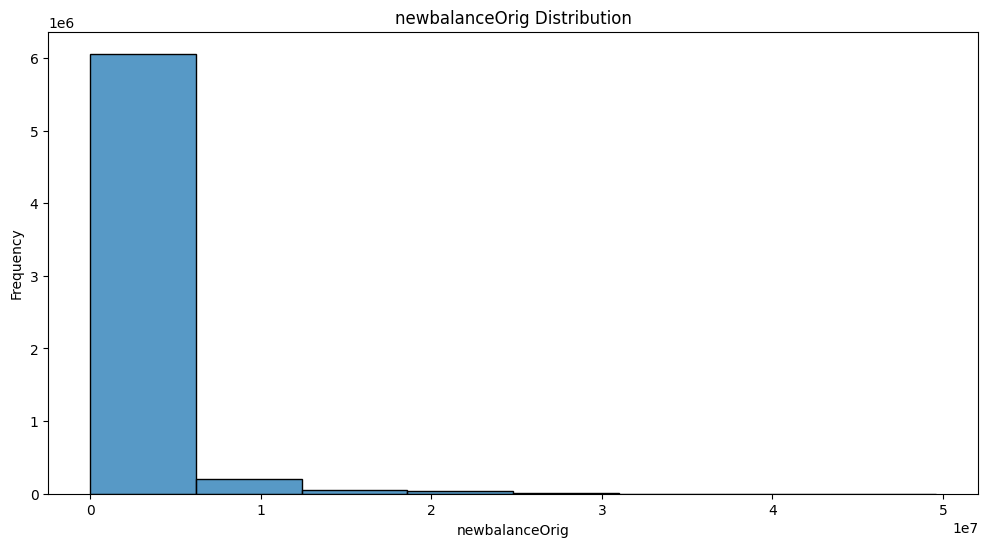

In [ ]:
# Data Distribution Visualization for new balance orig
plt.figure(figsize=(12, 6))
sns.histplot(df['newbalanceOrig'], bins=8)
plt.title('newbalanceOrig Distribution')
plt.xlabel('newbalanceOrig')
plt.ylabel('Frequency')
plt.show()

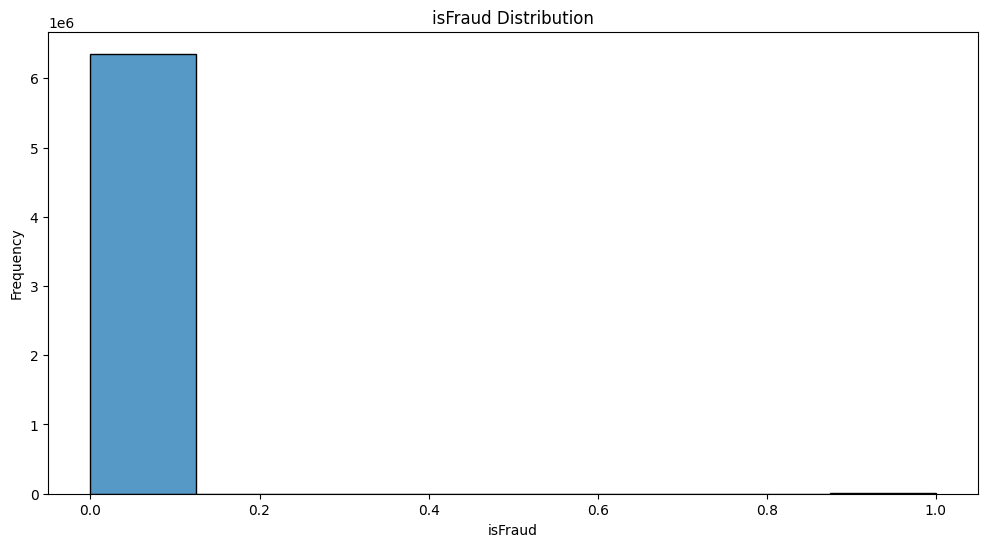

In [ ]:
 #Data Distribution Visualization for isFraud
plt.figure(figsize=(12, 6))
sns.histplot(df['isFraud'], bins=8)
plt.title('isFraud Distribution')
plt.xlabel('isFraud')
plt.ylabel('Frequency')
plt.show()

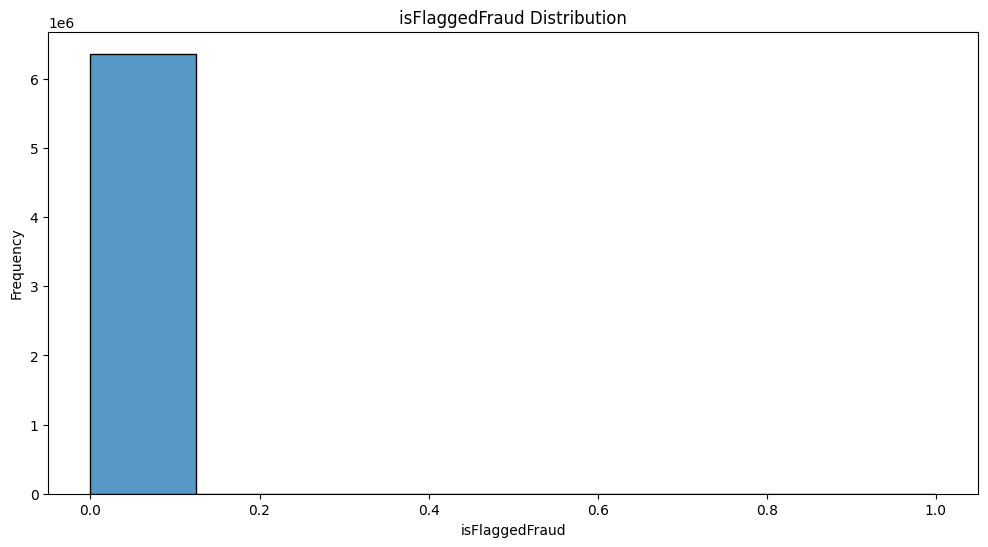

In [ ]:
 #Data Distribution Visualization for isFlaggedFraud
plt.figure(figsize=(12, 6))
sns.histplot(df['isFlaggedFraud'], bins=8)
plt.title('isFlaggedFraud Distribution')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#There are insignificant columns in the dataset. We will only consider the relevant columns and contnue working with those columns. The other columns are dropped
#df1 is newly created dataframe with non relevant features dropped off
df1 = df.drop(['isFlaggedFraud','nameOrig','nameDest', 'step'], axis = 1)
df1['isFraud'] = df1['isFraud'].map({0:'No_Its_not_Fraud', 1:'Yes_Its_Fraud'})
temp = df.drop(['isFlaggedFraud','nameOrig','nameDest', 'step'], axis = 1) #backup for further process
df1.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,No_Its_not_Fraud
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,No_Its_not_Fraud
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,Yes_Its_Fraud
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,Yes_Its_Fraud
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,No_Its_not_Fraud


In [6]:
fraud_counts= df1['isFraud'].value_counts()
fraud_counts

No_Its_not_Fraud    6354407
Yes_Its_Fraud          8213
Name: isFraud, dtype: int64

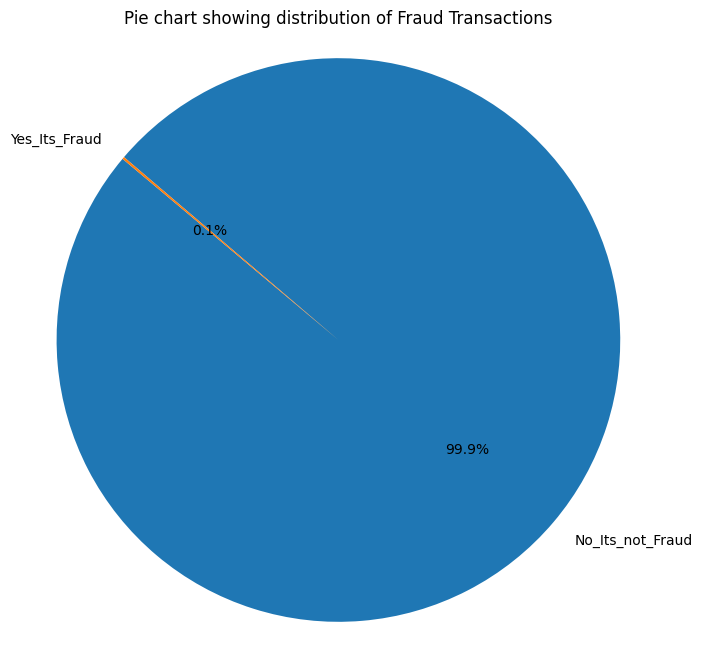

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie chart showing distribution of Fraud Transactions')
plt.axis('equal')
plt.show()

# Note: The conversion of the 'isFraud' column from numeric values (0 and 1) to a class variable serves the purpose of designating its position as the target or dependent variable in a classification scenario, specifically within the realm of fraud detection.

#There are 99.9% Non-fraudulent transactions while 0.1% transactions are fraudulent.

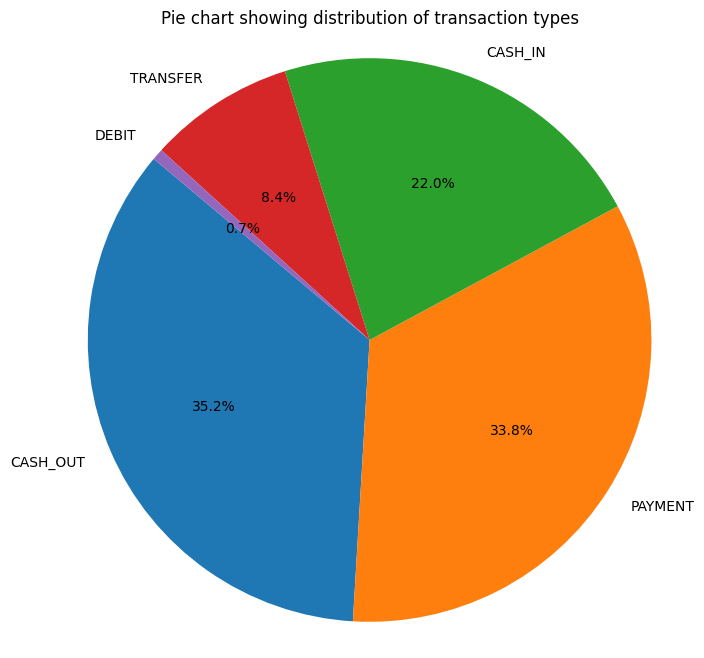

In [ ]:
type_counts= df['type'].value_counts()
type_counts
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie chart showing distribution of transaction types')
plt.axis('equal')
plt.show()

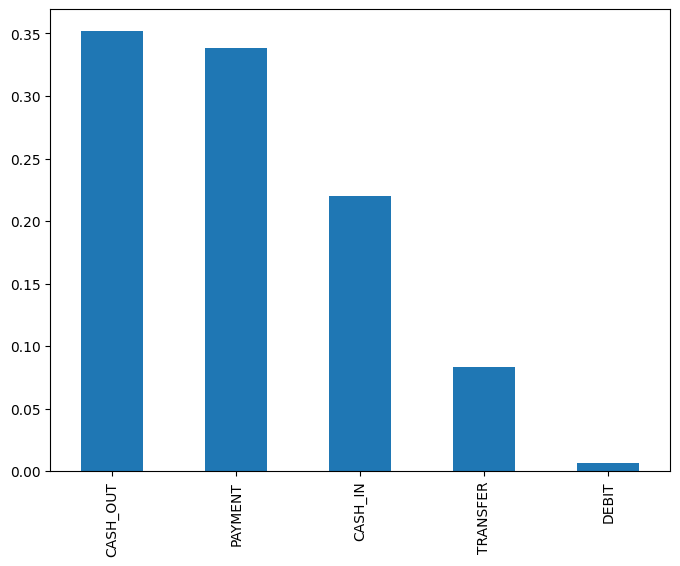

In [ ]:
fig = plt.figure(figsize =(8, 6))
df['type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

# **Most of the transactions were made through "CASH_OUT" mode. The "DEBIT"  transactions mode were used the least.**

In [ ]:
df1.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,No_Its_not_Fraud
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,No_Its_not_Fraud
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,Yes_Its_Fraud
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,Yes_Its_Fraud
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,No_Its_not_Fraud


In [ ]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<Figure size 1000x400 with 0 Axes>

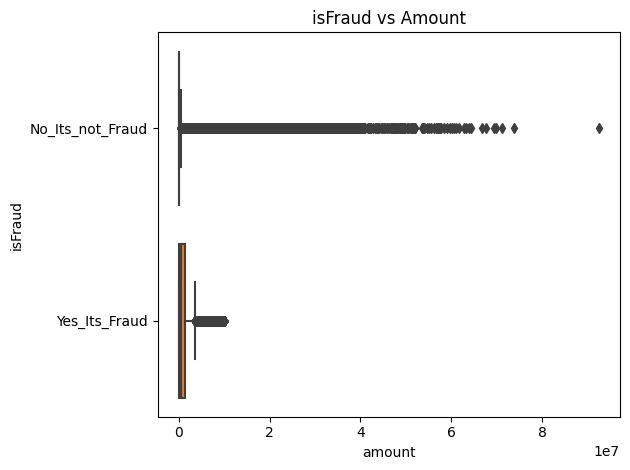

In [ ]:
# Outlier Detection suing boxplot (amount vs isFraud)
plt.figure(figsize=(10, 4))
plt.figure()
sns.boxplot(data=df1, x='amount',y='isFraud')
plt.title('isFraud vs Amount')
plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

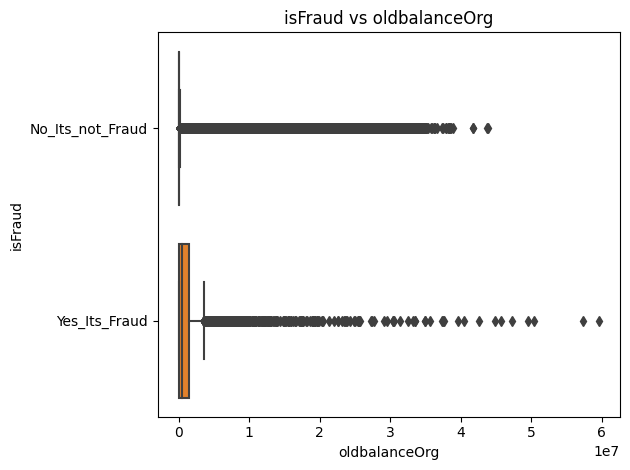

In [ ]:
# Outlier Detection suing boxplot (oldbalanceOrg vs isFraud)
plt.figure(figsize=(10, 4))
plt.figure()
sns.boxplot(data=df1, x='oldbalanceOrg',y='isFraud')
plt.title('isFraud vs oldbalanceOrg')
plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

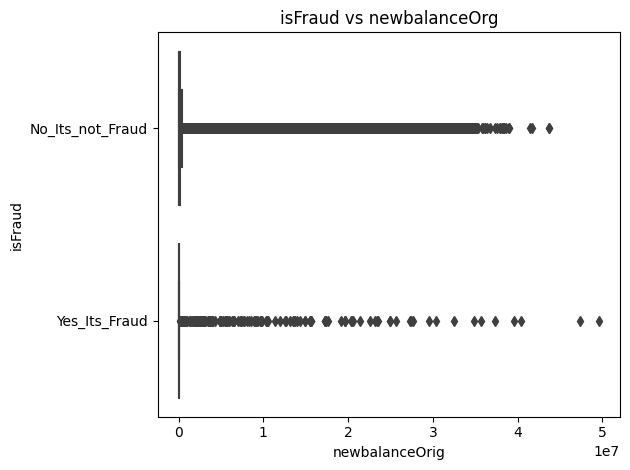

In [ ]:
# Outlier Detection suing boxplot (newbalanceOrig vs isFraud)
plt.figure(figsize=(10, 4))
plt.figure()
sns.boxplot(data=df1, x='newbalanceOrig',y='isFraud')
plt.title('isFraud vs newbalanceOrg')
plt.tight_layout()
plt.show()

# Note: The box plot shows that there are some unusual data points that might be signs of fraud in transactions. This suggests that the distribution of fraud and non-fraud cases is not balanced. Even though we've spotted these unusual points, we're not getting rid of them right away because there are already very few fraud cases, and removing them might make it harder to study. We'll deal with these unusual points later on, considering the imbalance between fraud and non-fraud cases.

# **BIVARIATE ANALYSIS**

In [7]:
#Spearman's Correlation Matrix
scm = temp.corr(method='spearman')
scm.head()

<ipython-input-7-349df9de81de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  scm = temp.corr(method='spearman')


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,0.047642,-0.070543,0.595401,0.670118,0.036060
oldbalanceOrg,0.047642,1.000000,0.803180,0.024034,-0.008188,0.039430
newbalanceOrig,-0.070543,0.803180,1.000000,0.044433,-0.094429,-0.028031
oldbalanceDest,0.595401,0.024034,0.044433,1.000000,0.935802,-0.017141
newbalanceDest,0.670118,-0.008188,-0.094429,0.935802,1.000000,-0.005182


In [8]:
#Checking the correlation Pearsonmethod
corr_matrix = temp.corr()
corr_matrix

<ipython-input-8-9c46a23224a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = temp.corr()


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [9]:
corr_matrix['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [10]:
scm['isFraud'].sort_values(ascending=False)

isFraud           1.000000
oldbalanceOrg     0.039430
amount            0.036060
newbalanceDest   -0.005182
oldbalanceDest   -0.017141
newbalanceOrig   -0.028031
Name: isFraud, dtype: float64

# Notes on Pearson Correlation:
'Amount' (0.076688):
There's a positive correlation, albeit a relatively weak one, between the 'Amount' and the likelihood of fraud. While not highly correlated, higher transaction amounts might slightly correlate with a higher chance of fraud.
'OldbalanceOrg' (0.010154) and 'NewbalanceDest' (0.000535):

Both display positive correlations with 'isFraud', but the correlations are quite weak. 'OldbalanceOrg' seems to have a slightly higher positive correlation than 'NewbalanceDest'.
'OldbalanceDest' (-0.005885) and 'NewbalanceOrig' (-0.008148):

Both exhibit negative correlations with 'isFraud', implying that higher values in these features might be associated with a lower likelihood of fraud. However, these correlations are also weak.

conclusion:
The correlations observed between the features and 'isFraud' are generally weak. Among the features, 'Amount' shows the strongest positive correlation, albeit still relatively modest. The negative correlations of 'OldbalanceDest' and 'NewbalanceOrig' suggest a potential but weak inverse relationship between these attributes and the occurrence of fraud.

While these correlations provide some insight, they might not be strong enough to solely rely on for predicting fraud. They can guide feature importance but should be considered alongside other modeling techniques or feature selection strategies for a comprehensive fraud detection model.

#Comparision with Pearson
the Spearman Method
'OldbalanceOrg' (0.039430) and 'Amount' (0.036060):

Both show a positive correlation with 'isFraud'. However, the correlations are relatively weak. This suggests a slight positive relationship between these features and the likelihood of fraud, but the influence might not be significant.
'NewbalanceDest' (-0.005182), 'OldbalanceDest' (-0.017141), 'NewbalanceOrig' (-0.028031):

These features exhibit negative correlations with 'isFraud'. The correlations are weak, indicating that higher values in these features might be associated with a lower likelihood of fraud. Among these, 'NewbalanceOrig' shows the strongest negative correlation.

Conclusion:

Similar to the previous correlations, these coefficients demonstrate weak associations between the features and the 'isFraud' target. While 'OldbalanceOrg' and 'Amount' exhibit weak positive correlations, 'NewbalanceDest', 'OldbalanceDest', and 'NewbalanceOrig' show weak negative correlations. This suggests potential but minor influences of these features on fraud detection.

The relationships captured by these correlations might not be strong enough to solely determine or predict fraudulent activities. It's essential to complement these insights with other modeling techniques or feature selection strategies to build a robust fraud detection model.

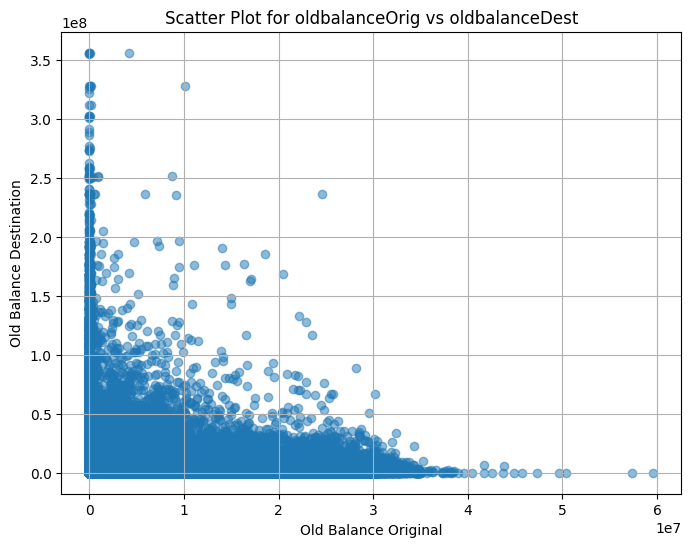

In [ ]:
#ScatterPlot for orig old balance vs dest old balance
oldbalanceOrig = df1['oldbalanceOrg']
oldbalanceDest = df1['oldbalanceDest']
plt.figure(figsize=(8, 6))
plt.scatter(oldbalanceOrig, oldbalanceDest, alpha=0.5)
plt.xlabel('Old Balance Original')
plt.ylabel('Old Balance Destination')
plt.title('Scatter Plot for oldbalanceOrig vs oldbalanceDest')
plt.grid(True)
plt.show()

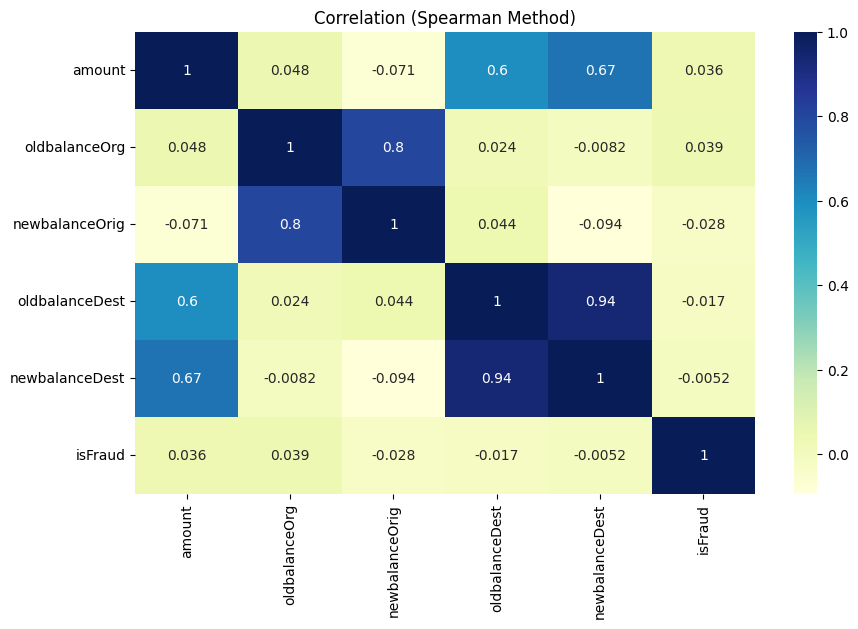

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(scm, annot=True, cmap='YlGnBu')
plt.title('Correlation (Spearman Method)')
plt.show()

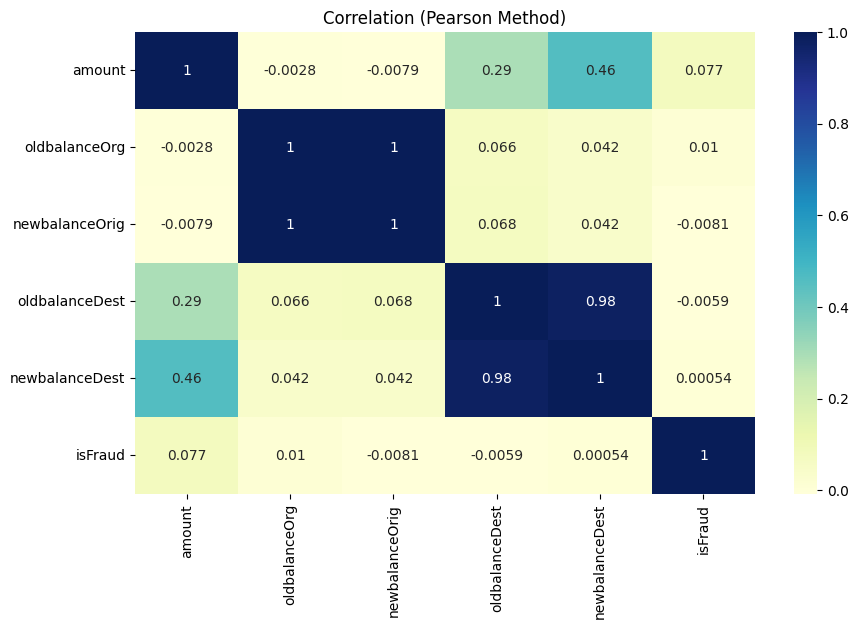

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation (Pearson Method)')
plt.show()

In [ ]:
#Findings : The correlation matrix using Pearson method suggest that there is no linear relationship between isFraud(the target variable) and other independant features
#The correlation matrix using Spearman method suggest that there is no linear relationship between isFraud(the target variable) and other independant features

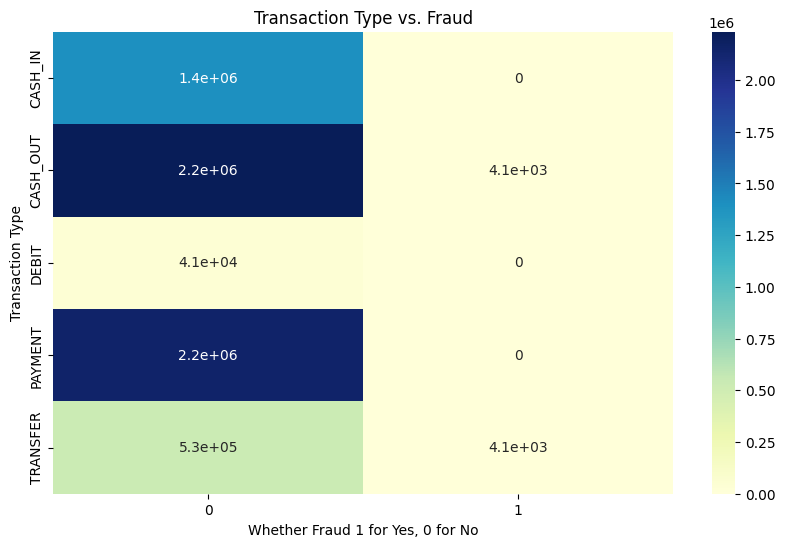

In [ ]:
# crosstab representation
ctab = pd.crosstab(df['type'], df['isFraud'])
plt.figure(figsize=(10, 6))
sns.heatmap(ctab, annot=True, cmap='YlGnBu')
plt.title('Transaction Type vs. Fraud')
plt.xlabel('Whether Fraud 1 for Yes, 0 for No')
plt.ylabel('Transaction Type')
plt.show()

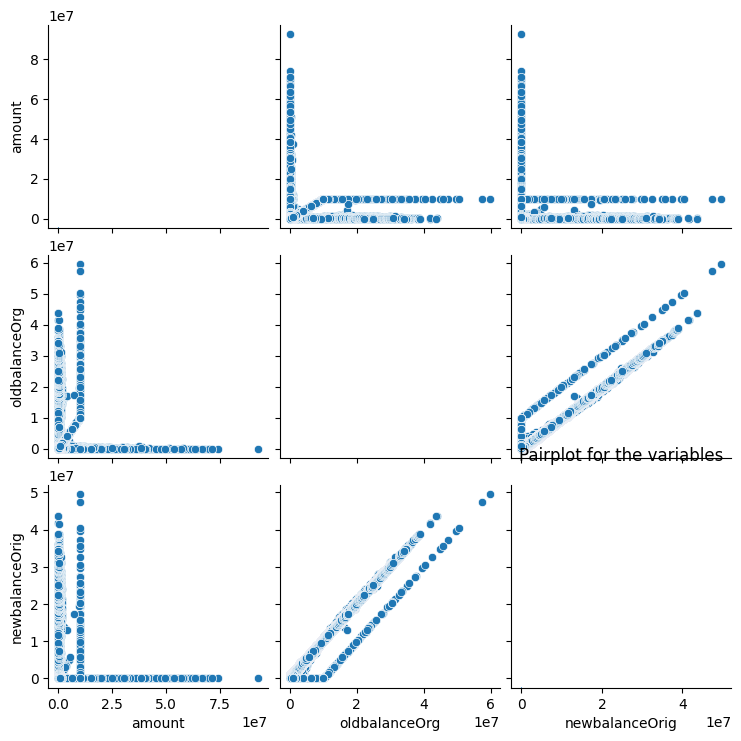

In [ ]:
# Multivariate Analysis
# Pairplot (for variables)
sns.pairplot(df1[['amount', 'isFraud','oldbalanceOrg','newbalanceOrig']])
plt.title('Pairplot for the variables')
plt.show()


# Note: It is important to note that the data is skewed to the left or negatively skewed


In [ ]:
temp.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
#Using the backup dataset for further process
temp['type'] = temp['type'].map({'CASH_IN':1,'CASH_OUT':2, 'DEBIT':3, 'PAYMENT':4, 'TRANSFER':5})
temp.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,4,9839.64,170136.0,160296.36,0.0,0.0,0
1,4,1864.28,21249.0,19384.72,0.0,0.0,0
2,5,181.00,181.0,0.00,0.0,0.0,1
3,2,181.00,181.0,0.00,21182.0,0.0,1
4,4,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
#Normalizing using Robust Scaler
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaled = rs.fit_transform(temp)
dfs = pd.DataFrame(scaled, columns = temp.columns)
dfs.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1.0,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0.0
1,1.0,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0.0
2,1.5,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1.0
3,0.0,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1.0
4,1.0,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0.0


# Note: Robust scaling was chosen for its lower sensitivity to outliers, allowing for normalization while maintaining the authenticity of the fraud-related data.

In [ ]:
dfs['isFraud'] = dfs['isFraud'].astype(int)

In [ ]:
dfs.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1.0,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0
1,1.0,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0
2,1.5,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1
3,0.0,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1
4,1.0,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0


In [ ]:
import pandas as pd

def count(df, txn_column, fraud_column, value):
    fraud_mask = df[fraud_column] == value
    fraud_data = df[fraud_mask]
    fraud_counts = fraud_data[txn_column].value_counts().reset_index()
    fraud_counts.columns = [txn_column, 'Fraud Count']
    return fraud_counts

fraud_txn_count = count(df, 'type', 'isFraud', 1)
print(fraud_txn_count)


       type  Fraud Count
0  CASH_OUT         4116
1  TRANSFER         4097


# The above analysis represents that the fraud transaction were only occuring in CASH_OUT and TRANSFER transactions.
#The other three payment methods are non-fraudulent.

# **ANOVA TEST**

In [11]:
from scipy.stats import f_oneway

def anova(df, target_column):
    numerical_columns = df.select_dtypes(include='number').columns
    results = pd.DataFrame(columns=['Column', 'F-statistic', 'P-value'])

    for column in numerical_columns:
        if df[column].nunique() > 1:
            groups = [df[column][df[target_column] == group] for group in df[target_column].unique()]
            f_statistic, p_value = f_oneway(*groups)
            results = pd.concat([results, pd.DataFrame({'Column': [column], 'F-statistic': [f_statistic], 'P-value': [p_value]})], ignore_index=True)

    return results

results = anova(temp, 'isFraud')
print(results)



           Column   F-statistic        P-value
0          amount  3.764066e+04   0.000000e+00
1   oldbalanceOrg  6.561317e+02  1.054289e-144
2  newbalanceOrig  4.224584e+02   7.168312e-94
3  oldbalanceDest  2.203865e+02   7.463207e-50
4  newbalanceDest  1.823504e+00   1.768967e-01
5         isFraud           inf   0.000000e+00


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


# Findings on ANOVA test :
Insights from F-Statistic and P-Value:
'Amount':

The F-statistic for 'Amount' is exceptionally high (3.764066e+04), indicating significant variability in this feature concerning the 'isFraud' target. The p-value (effectively zero) confirms that this variability is highly unlikely to be due to random chance, indicating 'Amount' is a crucial and strong indicator of fraudulent transactions.
'OldbalanceOrg' and 'NewbalanceOrig':

Both exhibit considerably high F-statistics (6.561317e+02 and 4.224584e+02, respectively) with extremely low p-values (1.054289e-144 and 7.168312e-94). This indicates significant variability in these attributes concerning fraud, making them influential factors in identifying fraudulent transactions.
'OldbalanceDest' and 'NewbalanceDest':

Both features have lower but still significant F-statistics (2.203865e+02 and 1.823504e+00) with associated p-values of 7.463207e-50 and 1.768967e-01. While 'OldbalanceDest' shows substantial variability related to fraud, 'NewbalanceDest' has a less pronounced impact.
'isFraud':

The F-statistic for 'isFraud' is infinite, which suggests this variable might not be suitable for ANOVA due to constant input arrays, making the F-statistic undefined. The associated p-value is effectively zero, supporting its significance in differentiating fraudulent transactions.

# **Splitting the data into X and target variable to y**

In [ ]:
temp.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
X = temp[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = temp[['isFraud']]

In [ ]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,4,9839.64,170136.0,160296.36,0.0,0.0
1,4,1864.28,21249.0,19384.72,0.0,0.0
2,5,181.00,181.0,0.00,0.0,0.0
3,2,181.00,181.0,0.00,21182.0,0.0
4,4,11668.14,41554.0,29885.86,0.0,0.0


In [ ]:
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


# **Using TRAIN_TEST_SPLIT with 50:50 proportion and *stratified sampling* to deal with IMBALANCE**



This is biased if the train and test proportions for y are not equal.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.50, random_state=3, stratify= y)

In [ ]:
y_train.value_counts()

isFraud
0          3177203
1             4107
dtype: int64

In [ ]:
y_test.value_counts()

isFraud
0          3177204
1             4106
dtype: int64

In [ ]:
y_train.value_counts(normalize = True) *100 #expressed in percent

isFraud
0          99.870902
1           0.129098
dtype: float64

In [ ]:
y_test.value_counts(normalize = True) *100 #expressed in percent

isFraud
0          99.870934
1           0.129066
dtype: float64

> NOTES

1. After using stratified sampling, we can see that the distribution of target feature is same on y_train(99.87% and 0.129%) and y_test(99.87% and 0.129%). Hence the class is now *BALANCED*.
2.   The next task will be to balance both splits X and y using Oversampling or Undersampling.


A SHORT NOTE ON OVERSAMPLING:
1. Focuses on the "Highs" of the Feature in Question:
Oversampling primarily targets the minority class, which is often referred to as the "low" or "rare" class. It aims to increase the number of instances in the minority class to balance it with the majority class, which is typically the "high" or "common" class. This rebalancing helps machine learning models perform better by preventing them from being biased toward the majority class.

2. Preservation of Majority Class Data:
Oversampling does not remove or alter any instances of the majority class (the "high" or overrepresented class). The data points belonging to the majority class are typically kept as they are to preserve the valuable information they contain. Oversampling focuses on increasing the number of instances in the minority class, often by adding new instances or replicating existing ones.

3. Efficient Utilization of Available Data:
One of the advantages of oversampling is that it allows for the maximum utilization of the available data. By increasing the number of minority class instances, it helps create a more balanced distribution of class labels without discarding any data from the majority class.

In [ ]:
#SMOTE Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_train_os,y_train_os = smote.fit_resample(X_train,y_train)
print(X_train_os.shape)
print(y_train_os.shape)

(6354406, 6)
(6354406, 1)


A SHORT NOTE ON UNDERSAMPLING:
1. Focuses on the "Lows" of the Feature in Question:
Undersampling primarily targets the majority class, which is often referred to as the "high" or "common" class. It aims to reduce the number of instances in the majority class to balance it with the minority class, which is typically the "low" or "rare" class. This rebalancing helps machine learning models perform better by preventing them from being biased toward the majority class.

2. Preservation of Minority Class Data:
Undersampling does not remove or alter any instances of the minority class (the "low" or underrepresented class). The data points belonging to the minority class are typically kept as they are to preserve the valuable information they contain. Undersampling focuses on reducing the abundance of the majority class, often by randomly removing some of its data points.

In [ ]:
#Undersampling using the NearMiss Strategy
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_us,y_train_us=nm.fit_resample(X_train,y_train)
print(X_train_us.shape)
print(y_train_us.shape)

(8214, 6)
(8214, 1)


# We will be using the OVERSAMPLED data for our further model design as it seems to be an efficient data handling measure.

# **Using LOGISTIC REGRESSION MODEL with Stratified KFold cross validation**

In [ ]:
y_train_os=y_train_os.values.ravel() #Adjusting y to 1D array for the train data

In [ ]:
#USING LogRegression with Stratified KFOLD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True) #Cross validation parameters
logr_model = LogisticRegression()
scores = []
for train_index, test_index in skf.split(X, y):
    X_train_os, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_os, y_test = y.iloc[train_index], y.iloc[test_index]
    #Flattening y_train_os and y_test using ravel()
    y_train_os = y_train_os.values.ravel()
    y_test = y_test.values.ravel()
    logr_model.fit(X_train_os, y_train_os)
    y_pred = logr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

In [ ]:
scores

[0.997864087435679,
 0.998018112035608,
 0.9978027919316257,
 0.9976126187011011,
 0.9978798042315902,
 0.9991450063024352,
 0.9991732965350751,
 0.9992047301268974,
 0.9978578007173146,
 0.999185869971804]

In [ ]:
print('Average Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Average Accuracy: 0.998 (0.001)


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635440
           1       0.88      0.43      0.58       822

    accuracy                           1.00    636262
   macro avg       0.94      0.71      0.79    636262
weighted avg       1.00      1.00      1.00    636262

Confusion Matrix:
 [[635391     49]
 [   469    353]]


In [ ]:
data = np.array([[4,1864.28,21249.0,19384.72,0.0,0.0]])
logr_model.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

Classification Report:

Precision:
For class 0, it's perfect (1.00), but for class 1, it's 0.88. This means that when the model predicts class 1, it's correct 88% of the time.

Recall (Sensitivity):
For class 0, it's perfect (1.00), but for class 1, it's 0.43. This indicates that it correctly identifies 43% of the actual class 1 instances.

F1-Score:
The F1-score is the harmonic mean of precision and recall. For class 1, it's 0.58, which shows a balance between precision and recall for that class.

Support:
The number of actual occurrences of each class in the dataset.

Confusion Matrix:
True Positives (TP) and True Negatives (TN):
Class 0 has 635,391 true negatives and 353 true positives for class 1.

False Positives (FP) and False Negatives (FN):
There are 49 false positives for class 0 and 469 false negatives for class 1.

Insights:
The model is excellent at predicting class 0, as seen from the high precision, recall, and accuracy.

For class 1, while precision is relatively good, the recall is lower, indicating that it's not as effective in capturing all instances of class 1. It misses a significant number of actual class 1 instances (false negatives).

The model may require improvement in correctly identifying class 1 instances without incorrectly labeling too many class 0 instances as class 1 (reducing false negatives without significantly increasing false positives).

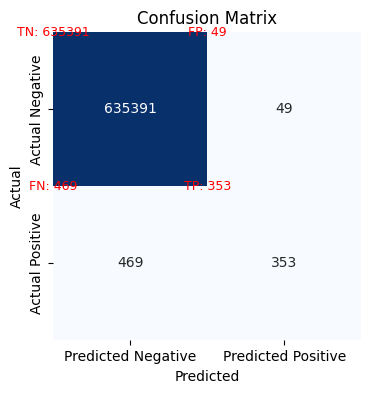

In [ ]:
#Confusion Matrix Visualisation with oversampled data
con_M = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(con_M, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.text(1, 1, f"TP: {con_M[1, 1]}", ha='center', va='center', fontsize=9, color='red')
plt.text(1, 0, f"FP: {con_M[0, 1]}", ha='center', va='center', fontsize=9, color='red')
plt.text(0, 1, f"FN: {con_M[1, 0]}", ha='center', va='center', fontsize=9, color='red')
plt.text(0, 0, f"TN: {con_M[0, 0]}", ha='center', va='center', fontsize=9, color='red')



plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Accuracy of the Logistic  Regression model
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy of the oversampled model with logistic regression  is : {acc1:.2f}")

Accuracy of the oversampled model with logistic regression  is : 1.00


In [ ]:
#AUC Score
from sklearn.metrics import roc_curve, auc, roc_auc_score
lrp = logr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lrp)
lr_auc = roc_auc_score(y_test, lrp)
print(f"Logistic Regression AUC: {lr_auc}")

Logistic Regression AUC: 0.92015880599086


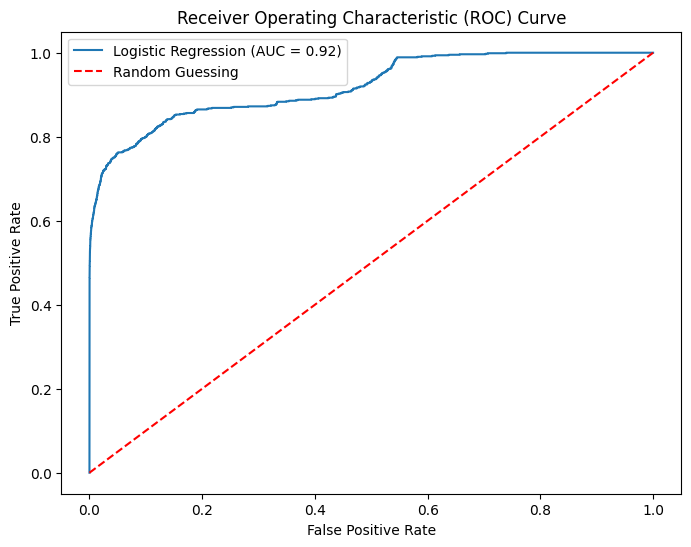

In [ ]:
#ROC Curve
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lrp)

plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **MODEL : RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)

scores = []

for train_index, test_index in skf.split(X, y):
    X_train_os, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_os, y_test = y.iloc[train_index], y.iloc[test_index]

    #Flattening y_train and y_test using ravel()
    y_train_os = y_train_os.values.ravel()
    y_test = y_test.values.ravel()

    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, 1):
    print(f"Accuracy of K-Fold {fold}: {score:.4f}")

# Average accuracy over all folds
average_accuracy = sum(scores) / len(scores)
print(f"Average Accuracy Of Random Forest: {average_accuracy:.4f}")

KeyboardInterrupt: ignored

In [ ]:
#ConfusionMatrix for the Random Forest Model
con_M2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(con_M2, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar=False)
TN, FP, FN, TP = con_M2.ravel()

conf_mat_values = np.array([[TP, FP], [FN, TN]])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_values, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Positive', 'Negative'])
plt.yticks([0.5, 1.5], ['Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Performance Score of Random Forest Classifier with oversampling
print("Classification Report:\n", classification_report(y_test, y_pred))

# **MODEL: NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Naive Bayes with Oversampling
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
nb = MultinomialNB()
accuracy_scores = []
for train_index, test_index in skf.split(X, y):
    X_train_os, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_os, y_test = y.iloc[train_index], y.iloc[test_index]

    nb.fit(X_train_os, y_train_os)
    y_pred = nb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)



In [ ]:
con_M3_os = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_M3_os, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Performance Score of Naive Bayes
print("Classification Report for the oversampled data:\n", classification_report(y_test, y_pred))

# **MODEL: DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

dtm = DecisionTreeClassifier()

accuracy_scores = []
for train_index, test_index in skf.split(X, y):
    X_train_os, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_os, y_test = y.iloc[train_index], y.iloc[test_index]

    dtm.fit(X_train, y_train)
    y_pred_os = dtm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print(f"The Decision Tree Classifier Model (Oversampled) Accuracy (Stratified K-Fold CV) is: {mean_accuracy:.2f} ± {std_accuracy:.2f}")



In [ ]:
#Oversampling data
con_M4 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_M4, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Performance Score of Decision Tree Classifier (oversampled)
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
#Undersampled data
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
data = np.array([[2,4024.36,2671.00,0.00]])
dtm.predict(data)

In [ ]:
nb.predict(data)

In [ ]:
rf.predict(data)

In [ ]:
logr_model.predict(data)

CONCLUSION :

1.   THE DECISION TREE CLASSIFIER AND RANDOM FOREST CLASSIFIER ARE THE BEST PERFORMING MODELS WITH 99% ACCURACY
2.   USING LOGISTIC REGRESSION, THE MODEL ACHIEVES AN ACCURACY OF ~78%
3. USING NAIVE BAYES WOULD BE LEAST FEASIBLE.

